<a href="https://colab.research.google.com/github/isaaccorley/torchrs/blob/main/examples/probav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/isaaccorley/torchrs.git
%cd torchrs
!python3 setup.py install
!pip uninstall -y einops
!pip install einops

In [ ]:
!bash scripts/download_probav.sh

In [97]:
import torch
import torch.nn as nn
import einops
import numpy as np
from torchrs.datasets import PROBAV
from torchrs.models import RAMS
from torchrs.transforms import Compose, ToTensor


transform = Compose([ToTensor()])
dataset = PROBAV(
    split="train",
    band="RED",
    lr_transform=transform,
    hr_transform=transform
)
model = RAMS(
    scale_factor=3,
    t=9,
    c=1,
    num_feature_attn_blocks=12
)

In [91]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from torchvision.transforms.functional import to_pil_image


def tensor_to_fig(x):
  x = x.to(torch.float32)
  x = make_grid(x, nrow=5, normalize=True, scale_each=True)
  x = to_pil_image(x)
  x = np.array(x)
  return x

def plot_compare(lr, hr, cmap="viridis"):
  if lr.shape[-1] == 3:
    lr = lr.mean(axis=-1)
  if hr.shape[-1] == 3:
    hr = hr.mean(axis=-1)
  fig, ax = plt.subplots(1, 2, figsize=(15,25))
  ax[0].imshow(lr, cmap=cmap)
  ax[1].imshow(hr, cmap=cmap)
  ax[0].axis("off")
  ax[1].axis("off")
  plt.tight_layout()

def plot(x, size=10, cmap="viridis"):
  if x.shape[-1] == 3:
    x = x.mean(axis=-1)
  fig, ax = plt.subplots(1, 1, figsize=(size, size))
  ax.imshow(x, cmap=cmap)
  ax.axis("off")
  plt.tight_layout()

def plot_widget(idx):
  sample = dataset[i]
  plot_compare(tensor_to_fig(sample["lr"]), tensor_to_fig(sample["hr"]))

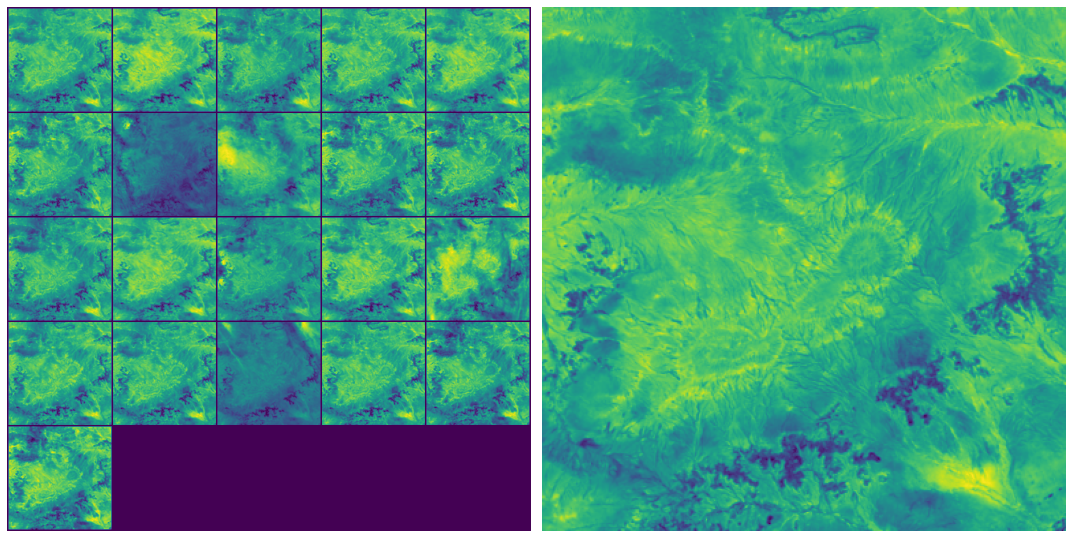

In [81]:
#@title Image Browser  { run: "auto", vertical-output: true }
idx = 357 #@param {type:"slider", min:0, max:594, step:1}
sample = dataset[idx]
plot_compare(tensor_to_fig(sample["lr"]), tensor_to_fig(sample["hr"]))